In [1]:
# reload magic
%load_ext autoreload
%autoreload 2

In [6]:
import pickle
import os 
import numpy as np
from mindreadingautobots.sequence_generators import make_datasets, data_io
from mindreadingautobots.entropy_and_bayesian.entropy import plot_entropy_and_convergence
from mindreadingautobots.entropy_and_bayesian import entropy
import matplotlib.pyplot as plt
import time

In [ ]:
entropy_steps = np.linspace(0, 1, 11)
bitflip_steps = entropy.binary_entropy_inverse(entropy_steps)

print(bitflip_steps)
# print(entropy.binary_entropy(x))

[0, 0.012, 0.030, 0.053, 0.080, 0.111, 0.148, 0.192, 0.246, 0.319]

[0.         0.01174184 0.03014915 0.05301842 0.080096   0.11168642
 0.14859553 0.19240156 0.2463537  0.31898926 0.5       ]


In [3]:
# # Generate data with bitflip values
# n_val = 10000 # number of validation examples
# seed = 1234
# n_data = 1000000
# n_bits = 16 # number of TOTAL bits
# # variables
# # p_bitflips = [0, 0.05, 0.1]
# # p_bitflips = [0.15]
# p_bitflips = [0.2]

# def hamilton_6_choose_4(n_data, n_bits, p_bitflip, seed):
#     return make_datasets.k_choose_m_hamilton_forecast_dataset(k=6, m=4, n_data=n_data, n_bits=n_bits, p_bitflip=p_bitflip, seed=seed)


# X, Z, idx = hamilton_6_choose_4(n_data, n_bits, p_bitflips[0], seed)

In [86]:
# Create a different dataset for every 'nondeterministic' value in this list
# Note that _sometimes_ this means bitflip rate, but not always
p_bitflips = [0.0, 0.1]
# p_bitflips = [0]

inc = 500 # increment at which to check convergence
# Generate data with bitflip values
seed = 1234 
n_data = int(1e4)
n_bits = 16 
intermediate_idx = list(range(inc, n_data, inc))

all_H = []
all_mle = []
for i in range(len(p_bitflips)):
    print("computing for p_bitflip = ", p_bitflips[i])
    X, Z, idx = make_datasets.k_choose_m_hamilton_forecast_dataset(6, 4, n_data, n_bits, p_bitflips[i], seed)
    H_results, mle_results = empirical_entropy_estimate(Z, intermediate_idx=intermediate_idx)
    all_H.append(H_results)
    all_mle.append(mle_results)

computing for p_bitflip =  0.0
computing for p_bitflip =  0.1


In [32]:
inc = 50000 # increment at which to check convergence
# Generate data with bitflip values
seed = 1234 
n_data = int(65)
n_bits = 16 
intermediate_idx = list(range(inc, n_data, inc))

X, Z, idx = make_datasets.k_choose_m_hamilton_forecast_dataset(6, 4, n_data, n_bits, 0.0, seed)

Hvals, mle_vals = empirical_entropy_estimate(Z, intermediate_idx=[-1])

1
[-1]
2
{(0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1): np.int64(1), (0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1): np.int64(1), (0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1): np.int64(1), (0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0): np.int64(2), (0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0): np.int64(1), (0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1): np.int64(1), (0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0): np.int64(1), (0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0): np.int64(3), (0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1): np.int64(3), (0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0): np.int64(1), (0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1): np.int64(1), (0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1): np.int64(2), (0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1): np.int64(2), (0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0): np.int64(2), (0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1): np.int64(1), (0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0): np.int64(1), (0, 1, 1, 0, 1, 0, 1, 1, 1, 1,

Fano's inequality, in this setting, is 
$$
H(X_n|Z^{n-1}) \leq h_2 (p_{err}) + p_{err}\log_2(N - 1) = h_2 (p_{err})
$$
Since $h_2$ is monotonic increasing, then so is $h_2^{-1}$, leading us to the inequality
$$
(1 - p_{err}) = p^* \leq 1 - h_2^{-1}(H(X_n|Z^{n-1}) )
$$
where $p^*$ is the success probability. We plot this upper bound below.

**Idea**: I think the post-hoc code tells us that as $n$ gets larger and larger, the success rate here should (??) approach capacity of the channel?

### (k=4, n=10) sparse parity analysis

[np.float64(0.9613273684210533), np.float64(0.7047463157894737), np.float64(0.5639978947368427)]


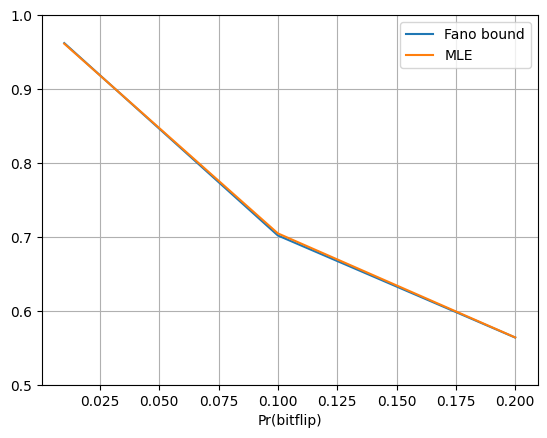

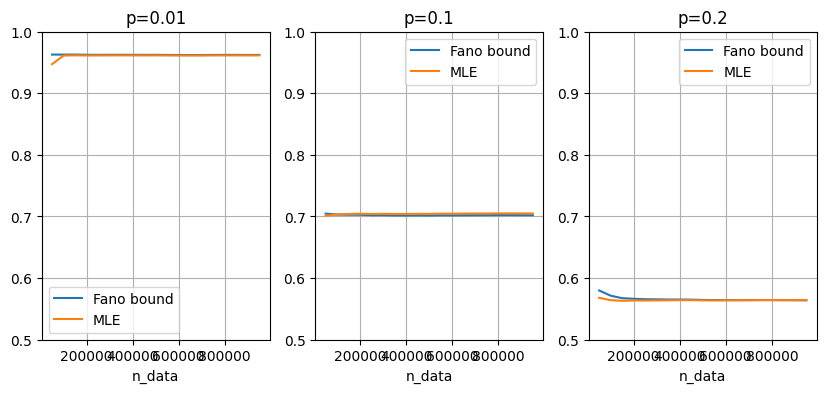

In [6]:
# Create a different dataset for every 'nondeterministic' value in this list
# Note that _sometimes_ this means bitflip rate, but not always
p_bitflips = [0.01, 0.1, 0.2]
all_H = []
all_mle = []

inc = 50000 # increment at which to check convergence
# Generate data with bitflip values
seed = 1234 
n_data = 1000000
n_bits = 10 
intermediate_idx = list(range(inc, n_data, inc))

for i in range(len(p_bitflips)):
    X, Z, idx = make_datasets.sparity_k4(n_data, n_bits, p_bitflips[i], seed)
    H_results, mle_results, _ = empirical_entropy_estimate(Z, intermediate_idx=intermediate_idx)
    all_H.append(H_results)
    all_mle.append(mle_results)


[np.float64(0.9613273684210533), np.float64(0.7047463157894737), np.float64(0.5639978947368427)]


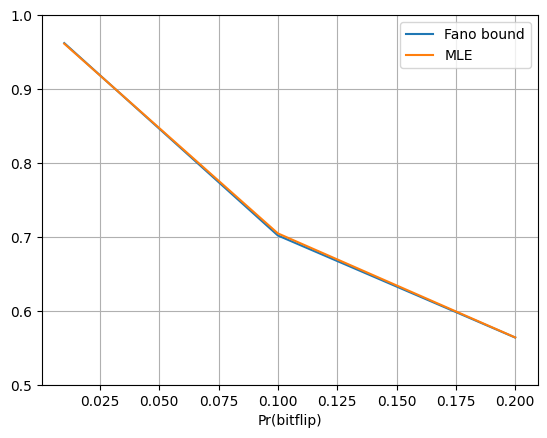

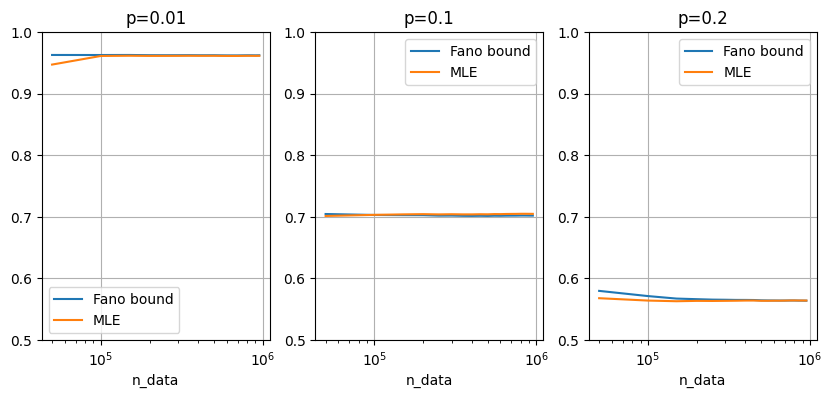

In [8]:
plot_entropy_and_convergence(all_H, all_mle, p_bitflips, intermediate_idx)

### Hamilton data

In [26]:
len(np.unique(Z[:6000], axis=1))

keys_n_new, counts_n = np.unique(X[:100,:], axis=0, return_counts=True)
print(counts_n)

[1 4 3 2 2 1 2 3 2 3 2 1 2 2 1 1 2 1 2 1 1 4 3 4 2 3 2 2 4 1 2 2 1 3 2 1 1
 1 2 1 1 4 1 3 1 2 2 1 2 3]


In [147]:
# Create a different dataset for every 'nondeterministic' value in this list
# Note that _sometimes_ this means bitflip rate, but not always
p_bitflips = [0.0, 0.1, 0.2]
# p_bitflips = [0]

inc = 5000 # increment at which to check convergence
# Generate data with bitflip values
seed = 1234 
n_data = int(1e6)
n_bits = 10 
intermediate_idx = list(range(inc, n_data, inc))

all_H = []
all_mle_noisy = []
all_mle_noiseless = []

for i in range(len(p_bitflips)):
    t0 = time.time()
    X, Z, idx = make_datasets.k_choose_m_hamilton_forecast_dataset(6, 4, n_data, n_bits, p_bitflips[i], seed, subseq_idx=[2, 3, 4, 5])
    print("generated data for p_bitflip = ", p_bitflips[i], " took ", time.time() - t0, " seconds")
    t0 = time.time()
    H_results, mle_results, lookup_results = empirical_entropy_estimate(Z, intermediate_idx=intermediate_idx)
    print("computed entropy for p_bitflip = ", p_bitflips[i], " took ", time.time() - t0, " seconds")
    all_H.append(H_results)
    all_mle_noisy.append(mle_results)
    # compute the MLE(trained on noisy) for the noiseless data
    t0 = time.time()
    mle_noiseless = compute_mle_with_lookup(X, lookup_results[-1])
    print("computed noiseless MLE for p_bitflip = ", p_bitflips[i], " took ", time.time() - t0, " seconds")
    all_mle_noiseless.append(mle_noiseless)



generated data for p_bitflip =  0.0  took  1.290036916732788  seconds
computed entropy for p_bitflip =  0.0  took  2.3722290992736816  seconds
computed noiseless MLE for p_bitflip =  0.0  took  4.569662094116211  seconds
generated data for p_bitflip =  0.1  took  1.5537188053131104  seconds
computed entropy for p_bitflip =  0.1  took  4.2080278396606445  seconds
computed noiseless MLE for p_bitflip =  0.1  took  4.154044151306152  seconds
generated data for p_bitflip =  0.2  took  1.548759937286377  seconds
computed entropy for p_bitflip =  0.2  took  4.580702781677246  seconds
computed noiseless MLE for p_bitflip =  0.2  took  4.11624813079834  seconds


In [189]:
# make a lookup table specifically to memorize our specific noisy training set
# hamilton_6_choose_4_nbits16_n2000_bf20_seed1234
lookuptable_benchmarks = []
for i in range(len(p_bitflips)):
    benchX, benchZ, idx = make_datasets.k_choose_m_hamilton_forecast_dataset(6, 4, 2000, 10, p_bitflips[i], 1234, subseq_idx=[2, 3, 4, 5])
    # print("idx=", idx)
    # train a lookup table on the noisy train data from our own experiments
    _, benchmle, bench_lookup = empirical_entropy_estimate(benchZ)
    mle_noisy_benchmark = compute_mle_with_lookup(benchZ, bench_lookup[0])
    lookuptable_benchmarks.append(mle_noisy_benchmark)


[np.float64(0.9999999999999997), np.float64(0.8508814070351748), np.float64(0.7084462311557783)]
199 199 199
199 199 199
199 199 199


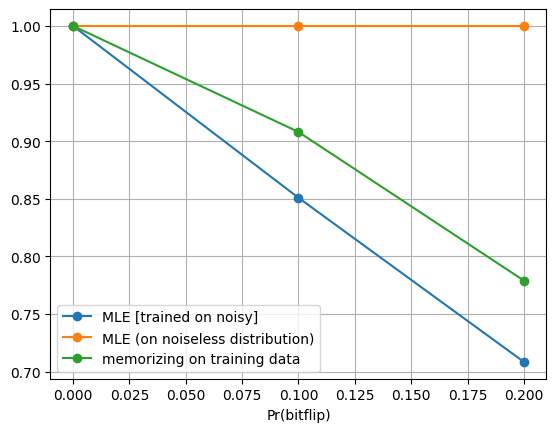

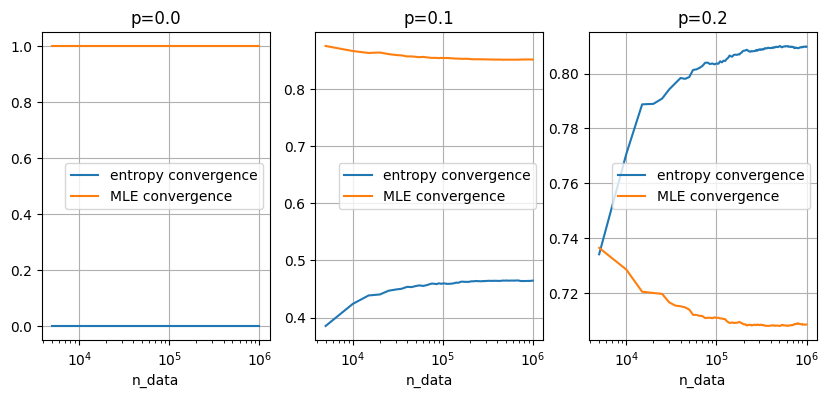

In [194]:
plot_entropy_and_convergence(all_H, all_mle_noisy, all_mle_noiseless, lookuptable_benchmarks, p_bitflips, intermediate_idx)